### Use KNN to classify iris dataset



In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# För skalning och kategoriska variabler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [81]:
iris = load_iris(as_frame=True)

df = iris.frame.copy() #hämtar hem datan som en dataframe
# df = load_iris(as_frame = True).frame => Gör allt i ett steg

df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
#Lägger till namnen på target för att se vilka namn som varje siffra motsvarar
#Target_names är inbyggd metadata i datasetet Iris. 
#.map(...)-rad bygger ihop targets med target_names till en ny kolumn i df
df["target_name"] = df["target"].map(dict(enumerate(iris.target_names)))

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


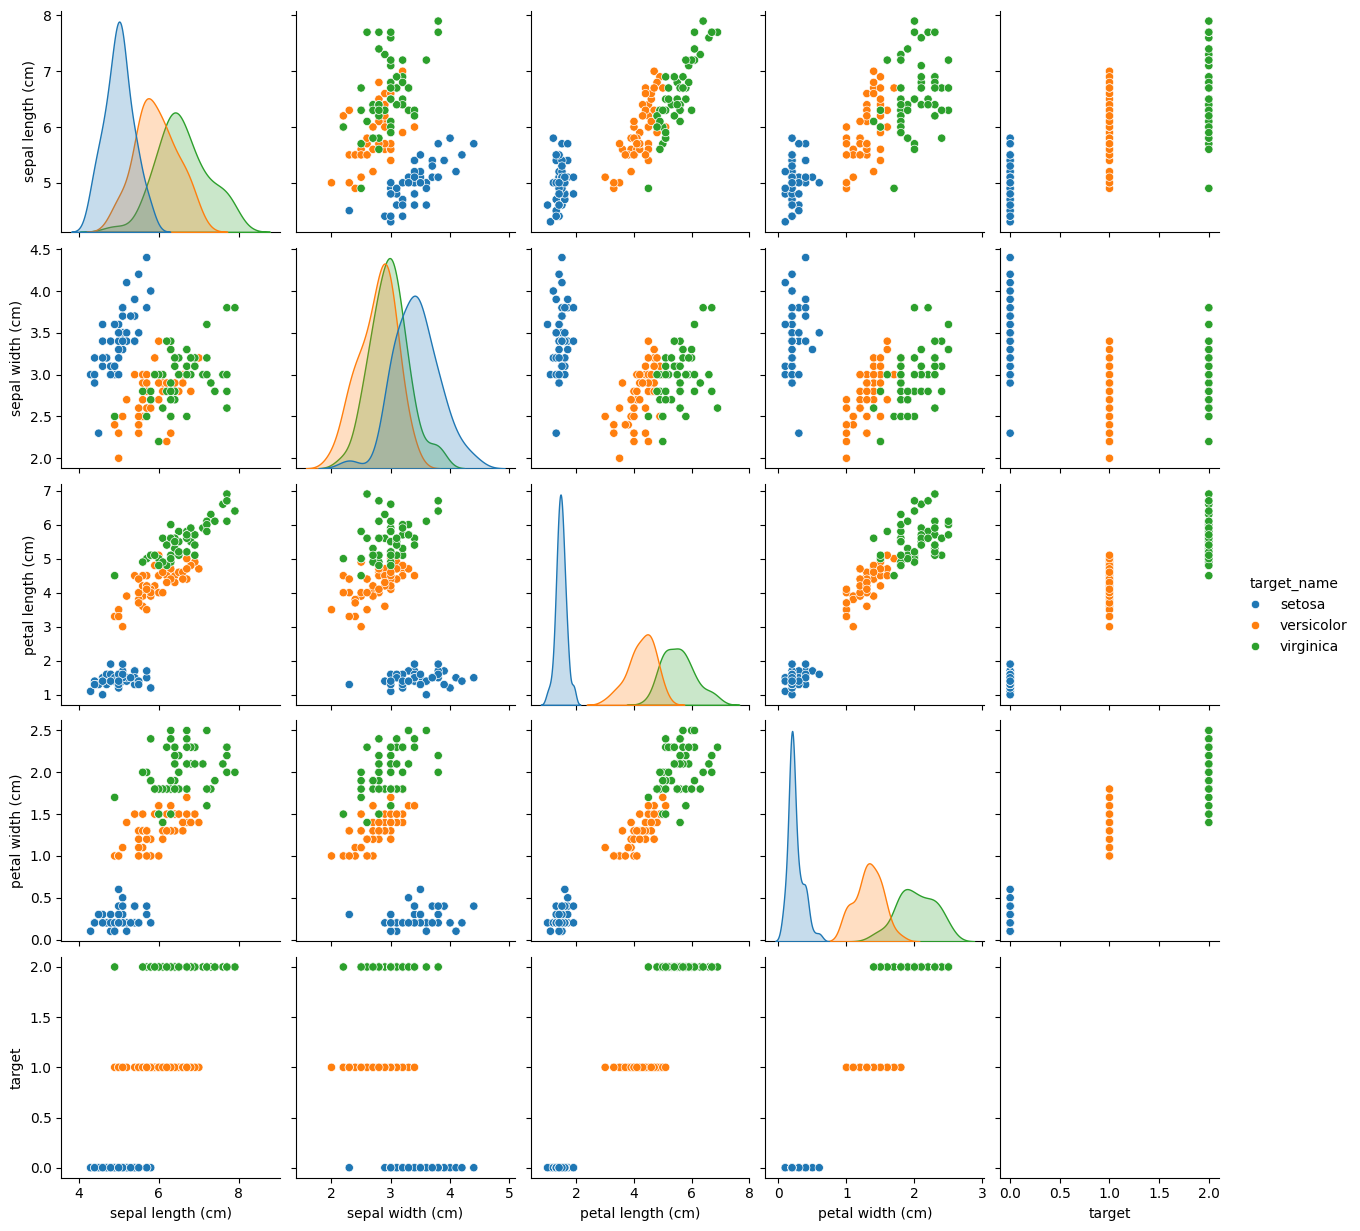

In [83]:
sns.pairplot(df, hue="target_name")
plt.show()

<Axes: >

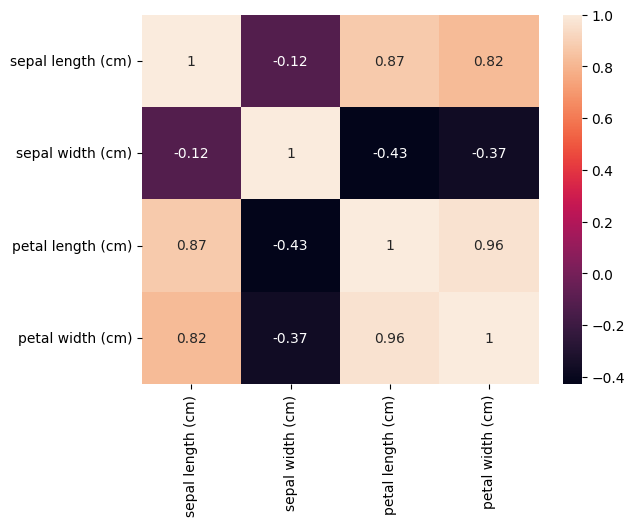

In [84]:
df_feat = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]

fig, ax = plt.subplots()

sns.heatmap(df_feat.corr(), annot=True, ax=ax)

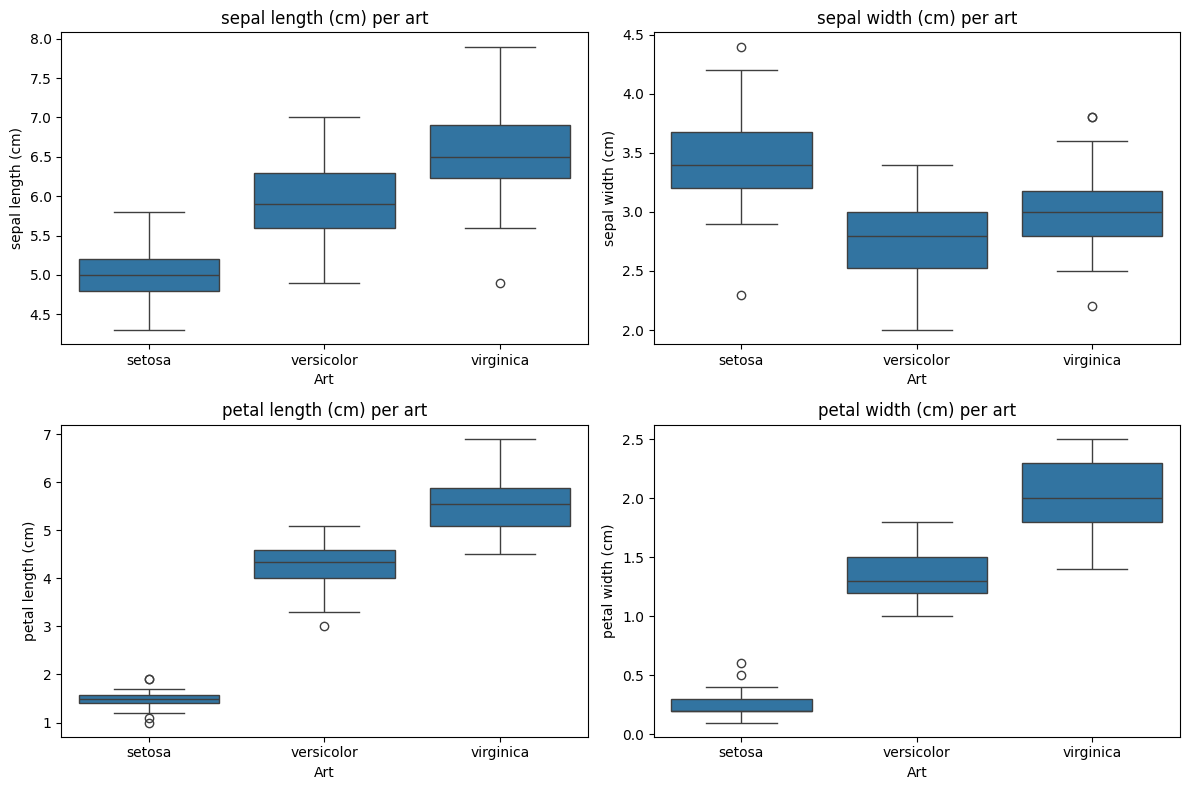

In [85]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feature in zip(axes.ravel(), df_feat.columns):
    sns.boxplot(data=df, x="target_name", y=feature, ax=ax)
    ax.set_title(f"{feature} per art")
    ax.set_xlabel("Art")
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()


In [86]:


X = df_feat
y = df["target"]

X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [92]:
scaler =  MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=1)

model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)

y_pred

array([1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 2, 1, 1, 2])

In [93]:
y_test.values

array([2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 2, 1, 2])

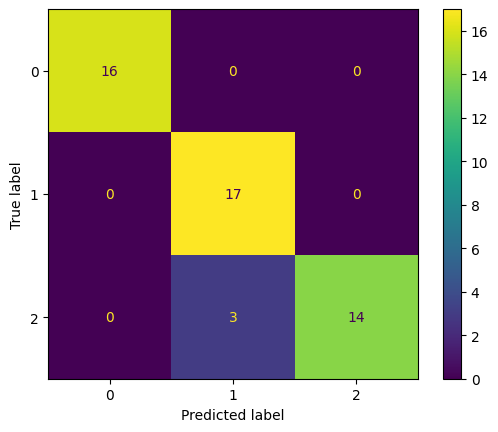

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        17
           2       1.00      0.82      0.90        17

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



##### Elbow plot

In [100]:
from sklearn.metrics import accuracy_score


error = 1 - accuracy_score(y_test, y_pred)

print(error)

0.06000000000000005


[Text(0, 0.5, 'Error'),
 Text(0.5, 1.0, 'Elbow plot'),
 Text(0.5, 0, 'number of neighbours')]

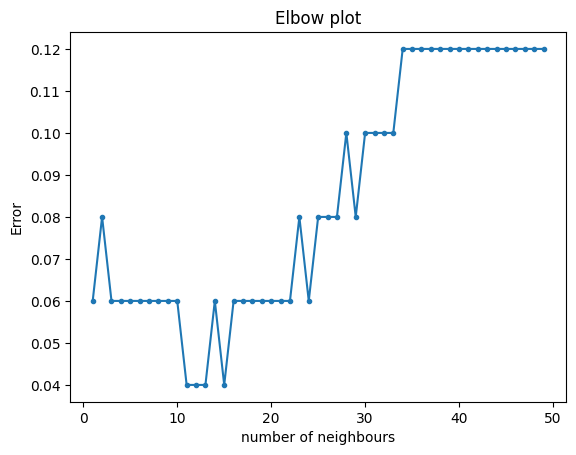

In [106]:
import numpy as np

error_list = []
for k in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    error_list.append(1-accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(1)
ax.plot(np.arange(1, len(error_list)+1), error_list, ".-")
ax.set(ylabel = "Error", title = "Elbow plot", xlabel= "number of neighbours")

In [108]:
model_knn = KNeighborsClassifier(13)
scaled_X = scaler.fit_transform(X)
model_knn.fit(scaled_X, y)



,n_neighbors,13
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None
